In [1]:
## Imports
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
from statsmodels.formula.api import ols
from latlon_utils import get_climate, get_data_dir
from matplotlib.colors import ListedColormap

sys.path.append('..')
from LAD import LAD, BinnedLAD, confidence_interval_from_extreme_regions

/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_71319/1464915901.py:7: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopanda

# Prep roi-WBD-NAHL
Create subset version of main data file with only WBD-NAHL ROI lakes.

In [2]:
df_HL_jn_full_pth = '/Volumes/thebe/Ch4/GSW_zonal_stats/HL/v4/HL_zStats_Oc_full.csv.gz'
gdf_HL_jn_pth = '/Volumes/thebe/Ch4/GSW_zonal_stats/HL/v3/HL_zStats_Oc_binned_jnBAWLD_roiNAHL.shp' # gives ROI
df_HL_BAWLD_NAHL_jn_full_pth = '/Volumes/thebe/Ch4/GSW_zonal_stats/HL/v4/HL_zStats_Oc_full_jnBAWLD_roiNAHL.csv.gz' # Output: main data source # HL clipped to BAWLD and WBD


## Load, if needed
gdf_hl = pd.read_csv(df_HL_jn_full_pth, compression='gzip')
gdf_roi = gpd.read_file(gdf_HL_jn_pth) # gives indexes of lakes in ROI


/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_71319/3394725772.py:7: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  gdf_hl = pd.read_csv(df_HL_jn_full_pth, compression='gzip')


KeyboardInterrupt: 

In [ ]:
gdf_hl

,Unnamed: 0,Class_70,Class_71,Class_72,Class_73,Class_74,Class_75,Class_76,Class_77,Class_sum,...,Vol_res,Dis_avg,Pour_lat,Vol_src,Country,Lake_name,system:index,Class_98,Class_99,Class_100
0,0,0.001,0.002,0.000,0.001,0.001,0.000,0.003,0.001,0.248,...,0.0,0.131,50.391481,3.0,Canada,NaN,001b0000000000004e0d,NaN,NaN,NaN
1,1,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.005,0.253,...,0.0,3.071,50.121770,3.0,Canada,NaN,001b00000000000051b5,NaN,NaN,NaN
2,2,0.003,0.000,0.000,0.001,0.001,0.001,0.000,0.003,0.363,...,0.0,0.005,50.490288,3.0,Canada,NaN,001b0000000000004c9d,NaN,NaN,NaN
3,3,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.002,0.109,...,0.0,0.001,50.485042,3.0,Canada,NaN,001b0000000000004cb5,NaN,NaN,NaN
4,4,0.001,0.000,0.001,0.001,0.000,0.000,0.003,0.003,0.154,...,0.0,0.001,50.357718,3.0,Canada,NaN,001b0000000000004e80,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112147,1112147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.374,...,0.0,0.000,79.639685,3.0,Russia,NaN,001f0000000000008301,NaN,NaN,NaN
1112148,1112148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480,...,0.0,-9999.000,79.627083,3.0,Russia,NaN,001f0000000000008305,NaN,NaN,NaN
1112149,1112149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.236,...,0.0,0.695,79.532163,3.0,Russia,NaN,001f00000000000079b8,NaN,NaN,NaN
1112150,1112150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683,...,0.0,2.251,79.580108,3.0,Russia,NaN,001f000000000000830d,NaN,NaN,NaN


In [ ]:
gdf_roi.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 754832 entries, 0 to 754831
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Hylak_id    754832 non-null  int64   
 1   0-5         754832 non-null  float64 
 2   5-50        754832 non-null  float64 
 3   50-95       754832 non-null  float64 
 4   95-100      754832 non-null  float64 
 5   Class_sum   754832 non-null  float64 
 6   Shp_Area    754832 non-null  float64 
 7   BAWLDCell_  754832 non-null  int64   
 8   n           754832 non-null  int64   
 9   distance    754832 non-null  float64 
 10  feature_x   754832 non-null  float64 
 11  feature_y   754832 non-null  float64 
 12  nearest_x   754832 non-null  float64 
 13  nearest_y   754832 non-null  float64 
 14  BAWLDLong   754832 non-null  float64 
 15  BAWLDLat    754832 non-null  float64 
 16  geometry    754832 non-null  geometry
dtypes: float64(13), geometry(1), int64(3)
memory usage: 97.9 MB

In [ ]:
gdf_hl = gdf_hl.drop(columns=['Unnamed: 0', 'system:index']).merge(gdf_roi['Hylak_id'], on='Hylak_id', how='inner')

In [ ]:
gdf_hl

,Class_70,Class_71,Class_72,Class_73,Class_74,Class_75,Class_76,Class_77,Class_sum,Class_8,...,Elevation,Vol_res,Dis_avg,Pour_lat,Vol_src,Country,Lake_name,Class_98,Class_99,Class_100
0,0.003,0.000,0.000,0.001,0.001,0.001,0.000,0.003,0.363,0.001,...,621.0,0.0,0.005,50.490288,3.0,Canada,NaN,NaN,NaN,NaN
1,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.002,0.109,0.001,...,630.0,0.0,0.001,50.485042,3.0,Canada,NaN,NaN,NaN,NaN
2,0.002,0.000,0.001,0.000,0.001,0.001,0.002,0.001,0.323,0.000,...,613.0,0.0,0.006,50.492419,3.0,Canada,NaN,NaN,NaN,NaN
3,0.005,0.002,0.002,0.001,0.003,0.002,0.000,0.005,0.198,0.002,...,612.0,0.0,0.004,50.498021,3.0,Canada,NaN,NaN,NaN,NaN
4,0.000,0.001,0.000,0.000,0.001,0.001,0.001,0.000,0.134,0.000,...,624.0,0.0,0.006,50.487126,3.0,Canada,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754827,0.002,0.000,0.000,0.000,0.001,0.002,0.000,0.000,0.164,0.001,...,29.0,0.0,0.037,67.556734,3.0,Canada,NaN,0.000,0.0,0.0
754828,0.000,0.000,0.001,0.001,0.002,0.002,0.000,0.000,0.140,0.001,...,32.0,0.0,0.001,67.528185,3.0,Canada,NaN,0.000,0.0,0.0
754829,0.001,0.000,0.001,0.000,0.000,0.001,0.000,0.001,0.103,0.000,...,28.0,0.0,0.001,67.522809,3.0,Canada,NaN,0.000,0.0,0.0
754830,0.000,0.000,0.000,0.003,0.001,0.001,0.000,0.001,0.226,0.000,...,20.0,0.0,0.071,67.637566,3.0,Canada,NaN,0.000,0.0,0.0


In [ ]:
## Write out large file
gdf_hl.to_csv(df_HL_BAWLD_NAHL_jn_full_pth)

# Downing plots

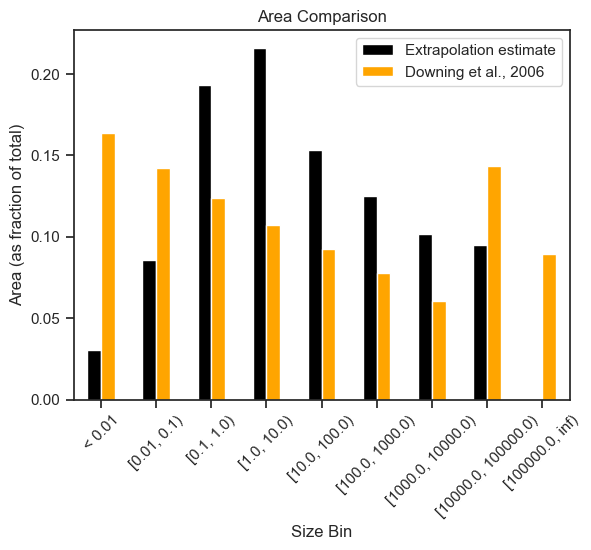

In [48]:
# Load the Excel file
df = pd.read_excel('/Users/ekyzivat/Library/CloudStorage/GoogleDrive-ethan_kyzivat@alumni.brown.edu/My Drive/Writing/Ch4/Revision1/Tables/Size_bin_table_norm_v20_Downing_save.xlsx', sheet_name='comb_bins', index_col='size_bin')

# Exclude the last row with index 'Sum'
df = df.iloc[:-1]

# Define custom colormap with black and orange
colors = ['black', 'orange']
custom_cmap = ListedColormap(colors)

# Plot the 'Area_Mkm2' and 'Downing Area norm'
fig, ax = plt.subplots()
df[['Area_Mkm2', 'Downing Area norm']].plot(kind='bar', colormap=custom_cmap, ax=ax)

# Set labels and title
ax.set_xlabel('Size Bin')
ax.set_ylabel('Area (as fraction of total)')
plt.xticks(rotation=45)
plt.title('Area Comparison')

# plt.legend(['My Arctic estimate', 'Conventional global estimate'])
plt.legend(['Extrapolation estimate', 'Downing et al., 2006'])

# Show the plot
plt.show()


# Compare to PLD global data!

In [13]:
lad = LAD.from_shapefile('/Volumes/thebe/Other/SWOT-PLD/v0.1/SWOT_PLD.gdb', name='PLD', area_var='ref_area', idx_var='lake_id', _areaConversionFactor=100, other_vars=['lon','lat'])
lad.Area_km2.sum()/1e6
# lad

2.5265799615903792

In [24]:
## Add Caspian Sea
caspian_shp = gpd.read_file(
    '/Volumes/thebe/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.shp', rows=1, engine='pyogrio', read_geometry=False)
caspian_shp
lad_caspian = LAD(caspian_shp, name='HL', area_var='Lake_area', idx_var='Hylak_id')
lad = LAD.concat((lad, lad_caspian),
                     broadcast_name=True, ignore_index=True)
lad

,Area_km2,Name,Region
0,0.0153,PLD,PLD
1,0.0207,PLD,PLD
2,0.0225,PLD,PLD
3,0.0468,PLD,PLD
4,0.2423,PLD,PLD
...,...,...,...
5988467,1.7672,PLD,PLD
5988468,1.2997,PLD,PLD
5988469,1.9816,PLD,PLD
5988470,2.5843,PLD,PLD


In [25]:
## Verify min area
lad.Area_km2.min()
lad.Area_km2.max()

377001.91

In [7]:
## Loading from CIR gdf
print('Load HR...')
regions = ['Sagavanirktok River', 'Yukon Flats Basin', 'Old Crow Flats', 'Mackenzie River Delta',
            'Mackenzie River Valley', 'Canadian Shield Margin', 'Canadian Shield', 'Slave River',
            'Peace-Athabasca Delta', 'Athabasca River', 'Prairie Potholes North',
            'Prairie Potholes South', 'Tuktoyaktuk Peninsula', 'All']
lad_cir = LAD.from_shapefile('/Volumes/thebe/Planet-SR-2/Classification/cir/dcs_fused_hydroLakes_buf_10_sum.shp',
                                area_var='Area', name='CIR', region_var='Region4', regions=regions, idx_var='OID_')

## Loading PeRL LAD
perl_exclude = ['arg0022009xxxx', 'fir0022009xxxx', 'hbl00119540701', 'hbl00119740617',
                'hbl00120060706', 'ice0032009xxxx', 'rog00219740726', 'rog00220070707',
                'tav00119630831', 'tav00119750810', 'tav00120030702', 'yak0012009xxxx',
                'bar00120080730_qb_nplaea.shp']
lad_perl = LAD.from_paths('/Volumes/thebe/PeRL/PeRL_waterbodymaps/waterbodies/*.shp',
                            area_var='AREA', name='perl', _areaConversionFactor=1000000, exclude=perl_exclude)

## Loading from Mullen
lad_mullen = LAD.from_paths('/Volumes/thebe/Other/Mullen_AK_lake_pond_maps/Alaska_Lake_Pond_Maps_2134_working/data/*_3Y_lakes-and-ponds.zip', _areaConversionFactor=1000000,
                            name='Mullen', computeArea=True)  # '/Volumes/thebe/Other/Mullen_AK_lake_pond_maps/Alaska_Lake_Pond_Maps_2134_working/data/[A-Z][A-Z]_08*.zip'

## Combine PeRL and CIR and Mullen
lad_ref = LAD.concat((lad_cir, lad_perl, lad_mullen),
                    broadcast_name=True, ignore_index=True)
compute_ci_lad=True
error_bars=True
ref_ds = 'Arctic HR'

Load HR...


In [66]:
## Alternatively, load WBD as ref
print('Load WBD...')
lad_ref = LAD.from_shapefile(
    '/Volumes/thebe/Other/Feng-High-res-inland-surface-water-tundra-boreal-NA/edk_out/fixed_geoms/WBD.shp', area_var='Area', name='WBD', idx_var='OBJECTID')
lad_ref.truncate(0.001, inplace=True)
compute_ci_lad=False
error_bars=False
ref_ds = 'WBD'

Load WBD...


In [27]:
## Simple extrap from HR
extreme_regions_lad = [
    'Tuktoyaktuk Peninsula', 'sur00120130802_tsx_nplaea']

# Truncation limits for ref LAD. tmax defines the right bound of the index region. tmin defines the leftmost bound to extrapolate to.
tmin, tmax = (0.0001, 1)

# Extrapolation limits. emax defines the left bound of the index region (and right bound of the extrapolation region).
emax = 0.05
binned_ref = BinnedLAD(lad_ref.truncate(tmin, tmax), tmin, emax, compute_ci_lad=compute_ci_lad,
                        extreme_regions_lad=extreme_regions_lad)  # reference distrib (try 5, 0.5 as second args)
# Beware chaining unless I return a new variable. # Try 0.1
lad_trunc = lad.truncate(emax, np.inf)
lad_trunc.extrapolate(binned_ref)
# meas = lad_hl_lev.sumAreas(includeExtrap=False)
# extrap = lad_hl_trunc.sumAreas()

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


Text(0.5, 1.0, 'Extrapolated from Arctic HR')

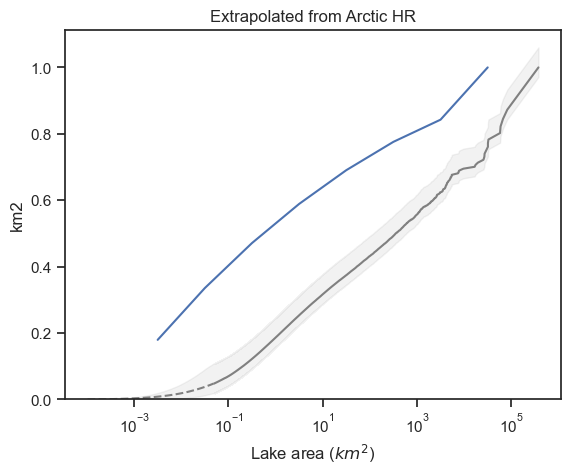

In [28]:
## Put Downing number into my BinnedLAD data structure, just to verify plot
btm = 0.001
top = 100000
nbins = 8
bin_edges = np.concatenate((np.geomspace(btm, top, nbins+1), [np.inf])).round(6) # bins computed from nbins and edges
area_bins = pd.IntervalIndex.from_breaks(bin_edges, closed='left')
X = bin_edges[1:] # plot against right bin edge
d06 = [692600, 602100, 523400, 455100, 392362, 329816, 257856, 607650, 378119]
group_sums = pd.Series(d06, index=area_bins, name='Area_km2') # from Downing 2006 paper
binnedAreas = confidence_interval_from_extreme_regions(group_sums, None, None, name='Area_km2') # # Why are lower/upper non NaN?? Ignore.
lad_d06 = BinnedLAD(btm=btm, top=top, nbins=nbins, binned_areas=binnedAreas, compute_ci_lad=False) # give btm, top, nbins, compute_ci_lad and binnedAreas args
# lad_d06_canon = BinnedLAD(btm=bin_edges[4], top=bin_edges[-2], nbins=4, binned_areas=confidence_interval_from_extreme_regions(group_sums[4:-1], None, None, name='Area_km2'), compute_ci_lad=False) # give btm, top, nbins, compute_ci_lad and binnedAreas args
# lad_d06_extrap = BinnedLAD(btm=bin_edges[0], top=bin_edges[4], nbins=4, binned_areas=confidence_interval_from_extreme_regions(group_sums[:4], None, None, name='Area_km2'), compute_ci_lad=False) # give btm, top, nbins, compute_ci_lad and binnedAreas args

fig, ax = plt.subplots()
lad_trunc.plot_extrap_lad(ax=ax, label='Lake area', error_bars=error_bars, normalized=True, color='grey', plotLegend=False)

lad_d06.plot(ax=ax, show_rightmost=False, as_lineplot=True, as_cumulative=True) # plot as binnedLAD, skipping top bin with Caspian Sea
plt.xscale('log')
plt.yscale('linear')
plt.title(f'Extrapolated from {ref_ds}')


In [29]:
lad_trunc.extrapLAD.binnedAreas

size_bin              stat 
[0.0001, 0.000106)    mean       68.661457
                      lower       5.212669
                      upper     107.251796
[0.000106, 0.000113)  mean      112.194229
                      lower       5.605317
                                  ...     
[0.044156, 0.046987)  lower    2909.119081
                      upper    7823.163803
[0.046987, 0.05)      mean     4786.852120
                      lower    2064.378104
                      upper    7071.675574
Name: Area_km2, Length: 300, dtype: float64

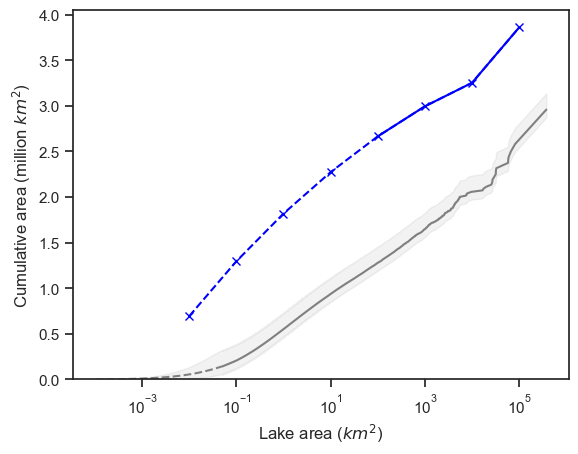

In [30]:
## Second way
fig, ax = plt.subplots()

# ## Put Downing number into my BinnedLAD data structure, just to verify plot
# lad_d06 = BinnedLAD(btm=btm, top=top, nbins=nbins, binned_areas=binnedAreas, compute_ci_lad=False) # give btm, top, nbins, compute_ci_lad and binnedAreas args
# # lad_d06_canon = BinnedLAD(btm=bin_edges[4], top=bin_edges[-2], nbins=4, binned_areas=confidence_interval_from_extreme_regions(group_sums[4:-1], None, None, name='Area_km2'), compute_ci_lad=False) # give btm, top, nbins, compute_ci_lad and binnedAreas args
# # lad_d06_extrap = BinnedLAD(btm=bin_edges[0], top=bin_edges[4], nbins=4, binned_areas=confidence_interval_from_extreme_regions(group_sums[:4], None, None, name='Area_km2'), compute_ci_lad=False) # give btm, top, nbins, compute_ci_lad and binnedAreas args
# lad_d06.plot(ax=ax, show_rightmost=False, as_lineplot=True, as_cumulative=True) # plot as binnedLAD, skipping top bin with Caspian Sea

# ax.plot(X, np.cumsum(d06)/np.sum(d06)) # units Mkm2 /1e6
d06_canonical = d06[4:]
d06_extrap = d06[:4]
ax.plot(X[:-1], np.cumsum(d06[:-1])/1e6, color='blue', marker='x',linestyle='dashed') # This time, exclude top bin to better compare with BAWLD domain # /np.sum(d06[:-1])
ax.plot(X[4:-1], (np.cumsum(d06_canonical[:-1])+np.sum(d06_extrap))/1e6, color='blue') # Plot canonical # /(np.sum(d06_canonical[:-1]) + np.sum(d06_extrap))
# ax.plot(X[:4], np.cumsum(d06_extrap)/np.sum(d06[:-1]), color='orange', linestyle='dashed') # Plot extrap

## Plot WBD
lad_trunc.plot_extrap_lad(ax=ax, label='Lake area', error_bars=True, normalized=False, color='grey', plotLegend=False)


ax.set_yscale('linear')
ax.set_xscale('log')
# ax.set_xticks(X)

In [49]:
## Bin
log_bins_upper = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
# now, bin upper values for Table estimate, use regions as placeholder to get dummy CI
lad_binned = BinnedLAD(lad, bins=log_bins_upper, compute_ci_lad=False,
                                    compute_ci_lev=False, compute_ci_lev_existing=True, normalize=False)

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
/Users/ekyzivat/Library/CloudStorage/Dropbox/Python/Ch4/notebooks/../LAD.py:1754: UserWarning: The first bin has count zero. Did you set the lowest bin edge < the lower truncation limit of the dataset?
  warn('The first bin has count zero. Did you set the lowest bin edge < the lower truncation limit of the dataset?')


141364.8005704814

In [59]:
df['PLD_area'] = lad_binned.binnedAreas.loc[:, 'mean'].values
df.loc['< 0.01', 'PLD_area'] = lad_trunc.extrapLAD.sumAreas()
df

,Area_Mkm2,LEV_Mkm2,Tg_yr,DC_Mkm2,Count,Downing Area,Downing Area norm,PLD_area
size_bin,,,,,,,,
< 0.01,0.030726,0.079164,0.115097,0.054039,NaN,692600,0.163387,141364.800570
"[0.01, 0.1)",0.085423,0.225184,0.192057,0.153714,NaN,602100,0.142038,150575.290708
"[0.1, 1.0)",0.193123,0.308796,0.275720,0.270802,0.509697,523400,0.123472,344374.712527
"[1.0, 10.0)",0.216017,0.193088,0.199174,0.285146,0.454582,455100,0.107360,386206.939445
"[10.0, 100.0)",0.153222,0.093624,0.100421,0.133285,0.032917,392362,0.092560,340607.411308
"[100.0, 1000.0)",0.124829,0.058149,0.059065,0.074730,0.002571,329816,0.077805,369664.607003
"[1000.0, 10000.0)",0.101504,0.030270,0.034596,0.025054,0.000215,257856,0.060829,409590.757900
"[10000.0, 100000.0)",0.095155,0.011725,0.023870,0.003230,0.000019,607650,0.143347,525560.242700
"[100000.0, inf)",0.000000,NaN,0.000000,NaN,0.000000,378119,0.089200,377001.910000


In [63]:
df.columns

Index(['Area_Mkm2', 'LEV_Mkm2', 'Tg_yr', 'DC_Mkm2', 'Count', 'Downing  Area',
       'Downing Area norm', 'PLD_area'],
      dtype='object')

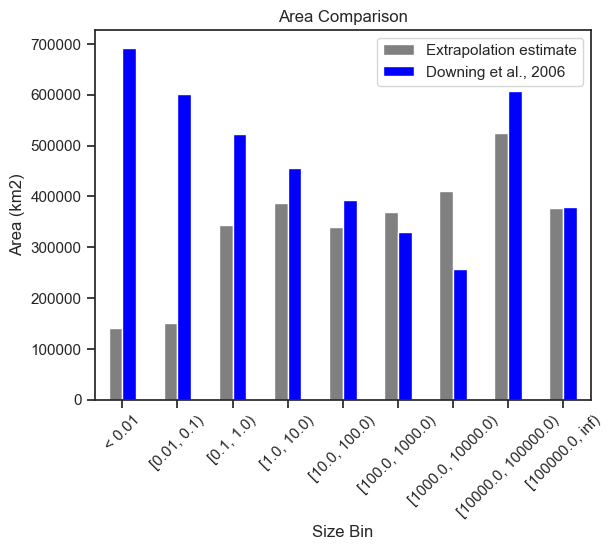

In [65]:
## Update the bar plot

# Define custom colormap with black and orange
colors = ['grey', 'blue']
custom_cmap = ListedColormap(colors)

# Plot the 'Area_Mkm2' and 'Downing Area norm'
fig, ax = plt.subplots()
df[['PLD_area', 'Downing  Area']].plot(
    kind='bar', colormap=custom_cmap, ax=ax)

# Set labels and title
ax.set_xlabel('Size Bin')
ax.set_ylabel('Area (km2)')
plt.xticks(rotation=45)
plt.title('Area Comparison')

# plt.legend(['My Arctic estimate', 'Conventional global estimate'])
plt.legend(['Extrapolation estimate', 'Downing et al., 2006'])

# Show the plot
plt.show()

In [33]:
# Orig area (note I added Caspian Sea to PLD)
lad.sumAreas(includeExtrap=False) / 1e6

# Orig area (compare to HL size domain)
# lad.truncate(0.1, np.inf).sumAreas(includeExtrap=False) / 1e6
# lad.area_fraction(0.1)

# Extrap area
# lad_trunc.sumAreas() / 1e6



2.903581871590379

# Compare to HL global dataset

In [34]:
## Load HL
lad_hl = LAD.from_shapefile('/Volumes/thebe/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.shp', name='HL', area_var='Lake_area', idx_var='Hylak_id', _areaConversionFactor=1)

In [35]:
## Compare to HL
lad_hl.sumAreas(includeExtrap=False) / 1e6

2.92672277